In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import datetime

import scipy.optimize as spo
import scipy.integrate as spi

### Preprocess data

In [2]:
df = pd.read_csv('datasets/timeseries.csv')
df_US = df[df['country']=='United States']

/Users/xinyi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,population,cases,deaths,recovered,date
604659,"New York, US",19453561,44635.0,519.0,2045.0,2020-03-27
604660,"New York, US",19453561,52318.0,728.0,2726.0,2020-03-28
604661,"New York, US",19453561,59513.0,965.0,3572.0,2020-03-29
604662,"New York, US",19453561,66497.0,1218.0,4204.0,2020-03-30
604663,"New York, US",19453561,75795.0,1550.0,4975.0,2020-03-31
604664,"New York, US",19453561,83712.0,1941.0,6142.0,2020-04-01
604665,"New York, US",19453561,92381.0,2373.0,7434.0,2020-04-02
604666,"New York, US",19453561,102863.0,2935.0,8886.0,2020-04-03
604667,"New York, US",19453561,113704.0,3565.0,10478.0,2020-04-04
604668,"New York, US",19453561,122031.0,4159.0,12187.0,2020-04-05


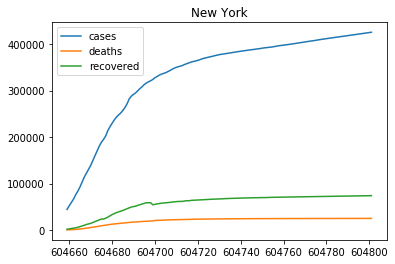

In [3]:
# state level, New York

df_state = df_US[(df_US["state"]=="New York") & (df_US["level"]=="state")]
df_state = df_state[["name", "population", "cases", "deaths", "recovered", "date"]]
df_state["date"] = pd.to_datetime(df_state["date"])
df_state = df_state.fillna(0)
df_state = df_state[df_state["recovered"]>0]

plt.figure()
plt.plot(df_state["cases"], label="cases")
plt.plot(df_state["deaths"], label="deaths")
plt.plot(df_state["recovered"], label="recovered")
plt.title("New York")
plt.legend();
df_state

### Set up the infection model

In [4]:
N = np.mean(df_state["population"])
sample = df_state[ (df_state["date"] >= np.datetime64('2020-04-01')) & (df_state["date"] < np.datetime64('2020-04-15')) ]
cases = np.array(list(sample["cases"]))
deaths = np.array(list(sample["deaths"]))
recovered = np.array(list(sample["recovered"]))

In [5]:
### SIR infection model
# s - susceptible = population - i - x - r
# i - infected    = cases - deaths - recovered
# x - dead        = deaths
# r - recovered   = recovered
X = deaths
R = recovered
I = cases - deaths - recovered
S = N - I - X - R

dS = S[1:] - S[:-1]
dI = I[1:] - I[:-1]
dX = X[1:] - X[:-1]
dR = R[1:] - R[:-1]

S = S[:-1]
I = I[:-1]
X = X[:-1]
R = R[:-1]

In [6]:
### differential equations

# s --lambda--> i 
# x <--omega-- i --miu--> r
# r --alpha--> s
# N = s + i + x + r

# ds/dt = - lamda*s/N*i + alpha*r
# di/dt = lamda*s/N*i - miu*i - omega*i
# dx/dt = omega*i
# dr/dt = miu*i - alpha*r

# INP - initial point, t - time range
# for spi.odeint
def diff_eqs(INP, t, lamda, miu, alpha, omega):
    Y = np.zeros((4))
    V = INP
    Y[0] = - lamda*V[0]*V[1]/N + alpha*V[3]
    Y[1] = lamda*V[0]*V[1]/N - miu*V[1] - omega*V[1]
    Y[2] = omega*V[1]
    Y[3] = miu*V[1] - alpha*V[3]
    return Y

In [7]:
### find the best params

# first guess of params
omega0 = np.mean(dX / I) # dx/dt = omega*i
alpha0 = 0.10
miu0 = np.mean((dR + alpha0*R) / I) # dr/dt = miu*i - alpha*r
lamda0 = np.mean(-(dS - alpha0*R) / S * N / I) # ds/dt = - lamda*s/N*i + alpha*r
params0 = (lamda0, miu0, alpha0, omega0)

def MSE(params):
    INP = (S[0], I[0], X[0], R[0])
    t_range = np.arange(0, len(S), 1)
    #lamda, miu, alpha, omega = tuple(params)
    RES = spi.odeint(diff_eqs, INP, t_range, args=tuple(params))
    
    mse = 0
    for i in range(len(S)):
        mse += ( (RES[i,0] - S[i]) ) **2
        mse += ( (RES[i,1] - I[i]) ) **2
        mse += ( (RES[i,2] - X[i]) ) **2
        mse += ( (RES[i,3] - R[i]) ) **2
    mse = mse / len(S)
    return mse

ret = spo.minimize(MSE, params0, bounds=[(0,1), (0,1), (0,1), (0,1)])
params = ret.x

# print(params0)
# print(params)
# print(ret)

(0.09433497346881348, 0.02539969816119471, 0.1, 0.005838700874800495)
[0.23039305 0.1551622  1.         0.00619196]


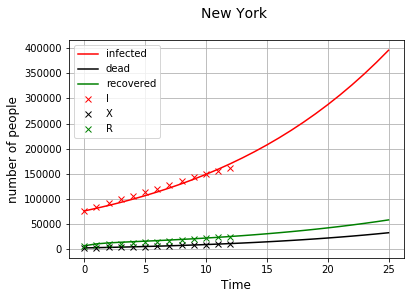

In [8]:
# solve ode numerically

INP = (S[0], I[0], X[0], R[0])
t_range = np.arange(0, len(S)*2, 1)
RES = spi.odeint(diff_eqs, INP, t_range, args=tuple(params))

# plot
fig, ax1 = plt.subplots()
#ax1.plot(RES[:,0], '-b', label='susceptible') 
ax1.plot(RES[:,1], '-r', label='infected')
ax1.plot(RES[:,2], '-k', label='dead')
ax1.plot(RES[:,3], '-g', label = 'recovered' )

#ax1.plot(S, "xb", label="S")
ax1.plot(I, "xr", label="I")
ax1.plot(X, "xk", label="X")
ax1.plot(R, "xg", label="R")

ax1.grid()
ax1.set_xlabel('Time', fontsize = 12)
ax1.set_ylabel('number of people', fontsize = 12)
ax1.legend(loc=0)
plt.title('New York \n',fontsize = 14)
plt.show();